In [1]:
import numpy as np
import pandas as pd 

Описание приложенного датасета 

Index: Row index

user id: User ID (unique)

test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement

converted: If a person bought the product then True, else is False

total ads: Amount of ads seen by person

most ads day: Day that the person saw the biggest amount of ads

most ads hour: Hour of day that the person saw the biggest amount of ads



In [2]:
df = pd.read_csv('marketing_AB.csv')
df

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


In [3]:
#распределение % удержанных (converted) пользователей. В колонках - дни недели, в строках - группа
df.query('converted == True').groupby('test group')['most ads day'].value_counts(normalize=True).unstack()

most ads day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
test group,,,,,,,
ad,0.138321,0.192609,0.116411,0.140539,0.118630,0.157388,0.136102
psa,0.147619,0.188095,0.095238,0.150000,0.188095,0.100000,0.130952


In [4]:
#строки - группы, колонки - количество удержанных, % удержанных, среднее количество рекламы(total_ads), медианное количество рекламы (должна быть иерархическая шапка, используя .agg)
df.groupby('test group')['converted', 'total ads'].agg({'converted':[lambda x: (x==True).sum() ,lambda x: x.mean()*100],'total ads':['mean','median']})

C:\Users\ermak\AppData\Local\Temp\ipykernel_7600\3315766742.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('test group')['converted', 'total ads'].agg({'converted':[lambda x: (x==True).sum() ,lambda x: x.mean()*100],'total ads':['mean','median']})


converted             total ads       
           <lambda_0> <lambda_1>       mean median
test group                                        
ad              14423   2.554656  24.823365   13.0
psa               420   1.785411  24.761138   12.0

In [5]:
#строки - группы, столбцы - количество записи, количество уникальных пользователей
df.groupby('test group')['Unnamed: 0'].agg(['count','nunique'])

,count,nunique
test group,,
ad,564577,564577
psa,23524,23524


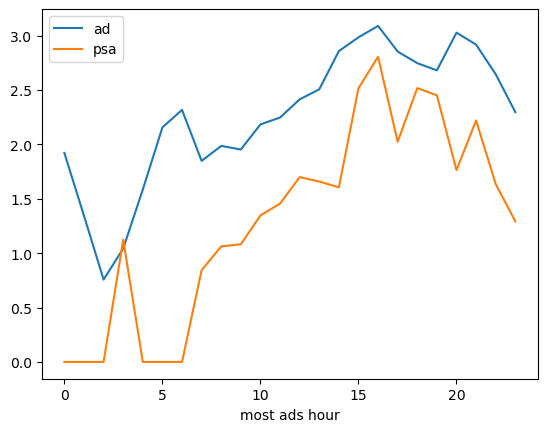

In [6]:
#y: распределение % удержанных (converted) пользователей. по x - часы, должно быть два графика - для тестовой группы и для контрольной
#df.query("test group == ad").groupby('converted')['most ads hour'].count().plot()
import matplotlib.pyplot as plt
df[df['test group'].values == 'ad'].groupby('most ads hour')['converted'].agg(lambda x: x.mean()*100).plot()
df[df['test group'].values == 'psa'].groupby('most ads hour')['converted'].agg(lambda x: x.mean()*100).plot()
plt.legend(['ad','psa'])

In [7]:
df[df['test group'].values == 'ad']['most ads hour']

0         20
1         22
2         18
3         10
4         14
          ..
588096    23
588097    23
588098    23
588099    23
588100    23
Name: most ads hour, Length: 564577, dtype: int64

In [8]:
#найти p-value используя ttest_ind из scipy.stats
from scipy.stats import ttest_ind
ttest_ind(df[df['test group'].values == 'ad'].groupby('most ads hour')['converted'].agg('mean'), df[df['test group'].values == 'psa'].groupby('most ads hour')['converted'].agg('mean'))


Ttest_indResult(statistic=4.283698033818981, pvalue=9.270228575537167e-05)